In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('data.csv')
dataset.tail()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
4595,308166.6667,3,1.75,1510,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,534333.3333,3,2.50,1460,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,416904.1667,3,2.50,3010,2.0,0,0,3,3010,0,2009,0,Renton
4598,203400.0000,4,2.00,2090,1.0,0,0,3,1070,1020,1974,0,Seattle
4599,220600.0000,3,2.50,1490,2.0,0,0,4,1490,0,1990,0,Covington


In [3]:
dataset.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [4]:
dic = {'Shoreline':1, 'Seattle':2, 'Kent':3, 'Bellevue':4, 'Redmond':5,
       'Maple Valley':6, 'North Bend':7, 'Lake Forest Park':8, 'Sammamish':9,
       'Auburn':10, 'Des Moines':11, 'Bothell':12, 'Federal Way':13, 'Kirkland':14,
       'Issaquah':15, 'Woodinville':16, 'Normandy Park':17, 'Fall City':18, 'Renton':19,
       'Carnation':20, 'Snoqualmie':21, 'Duvall':22, 'Burien':23, 'Covington':24,
       'Inglewood-Finn Hill':25, 'Kenmore':26, 'Newcastle':27, 'Mercer Island':28,
       'Black Diamond':29, 'Ravensdale':30, 'Clyde Hill':31, 'Algona':32, 'Skykomish':33,
       'Tukwila':34, 'Vashon':35, 'Yarrow Point':36, 'SeaTac':37, 'Medina':38,
       'Enumclaw':39, 'Snoqualmie Pass':40, 'Pacific':41, 'Beaux Arts Village':42,
       'Preston':43, 'Milton':44}

In [5]:
dataset.city = [dic[item] for item in dataset.city]
dataset

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3,1.50,1340,1.5,0,0,3,1340,0,1955,2005,1
1,2.384000e+06,5,2.50,3650,2.0,0,4,5,3370,280,1921,0,2
2,3.420000e+05,3,2.00,1930,1.0,0,0,4,1930,0,1966,0,3
3,4.200000e+05,3,2.25,2000,1.0,0,0,4,1000,1000,1963,0,4
4,5.500000e+05,4,2.50,1940,1.0,0,0,4,1140,800,1976,1992,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,1.0,0,0,4,1510,0,1954,1979,2
4596,5.343333e+05,3,2.50,1460,2.0,0,0,3,1460,0,1983,2009,4
4597,4.169042e+05,3,2.50,3010,2.0,0,0,3,3010,0,2009,0,19
4598,2.034000e+05,4,2.00,2090,1.0,0,0,3,1070,1020,1974,0,2


In [6]:
X = dataset.iloc[:,1:13]
Y = dataset.iloc[:, 0]

In [7]:
X

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3,1.50,1340,1.5,0,0,3,1340,0,1955,2005,1
1,5,2.50,3650,2.0,0,4,5,3370,280,1921,0,2
2,3,2.00,1930,1.0,0,0,4,1930,0,1966,0,3
3,3,2.25,2000,1.0,0,0,4,1000,1000,1963,0,4
4,4,2.50,1940,1.0,0,0,4,1140,800,1976,1992,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3,1.75,1510,1.0,0,0,4,1510,0,1954,1979,2
4596,3,2.50,1460,2.0,0,0,3,1460,0,1983,2009,4
4597,3,2.50,3010,2.0,0,0,3,3010,0,2009,0,19
4598,4,2.00,2090,1.0,0,0,3,1070,1020,1974,0,2


In [8]:
Y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

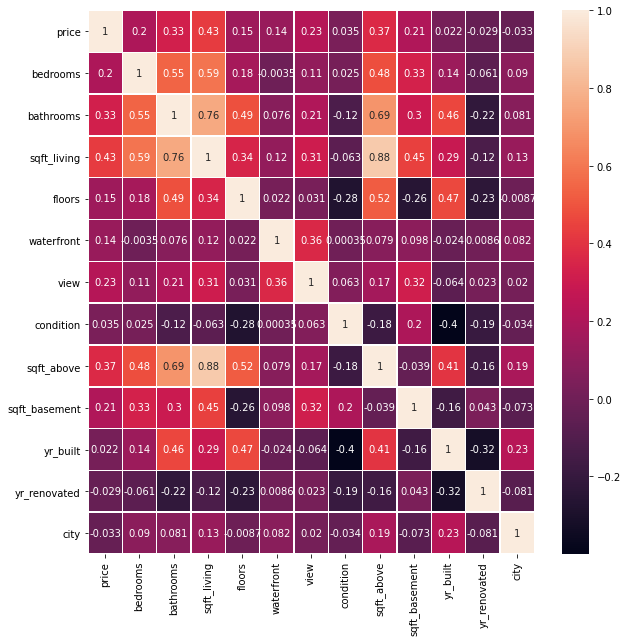

In [9]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax)

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state = 46) 

In [12]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 159130.93390981885
Mean Squared Error: 78345418614.20622
Root Mean Squared Error: 279902.5162698725


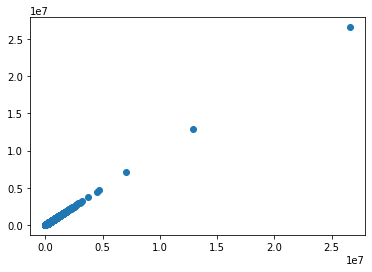

In [15]:
plt.scatter(y_train, regressor.predict(X_train))

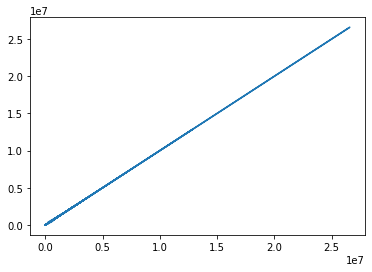

In [16]:
plt.plot(y_train, regressor.predict(X_train))

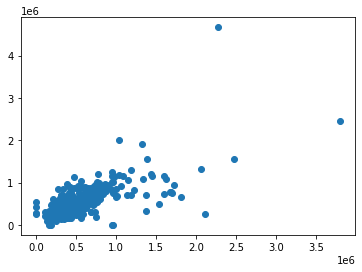

In [17]:
plt.scatter(y_test,y_pred)

In [18]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
1252,200000.0,348500.0
2315,700000.0,780000.0
3500,451000.0,675000.0
2047,589500.0,585000.0
3356,594000.0,450000.0
846,379950.0,375000.0
2379,585000.0,625000.0
2040,1370000.0,339000.0
509,201000.0,264000.0
2358,784000.0,696000.0


In [19]:
df.reset_index(drop=True, inplace=True)
df.head(10)

,Actual,Predicted
0,200000.0,348500.0
1,700000.0,780000.0
2,451000.0,675000.0
3,589500.0,585000.0
4,594000.0,450000.0
5,379950.0,375000.0
6,585000.0,625000.0
7,1370000.0,339000.0
8,201000.0,264000.0
9,784000.0,696000.0


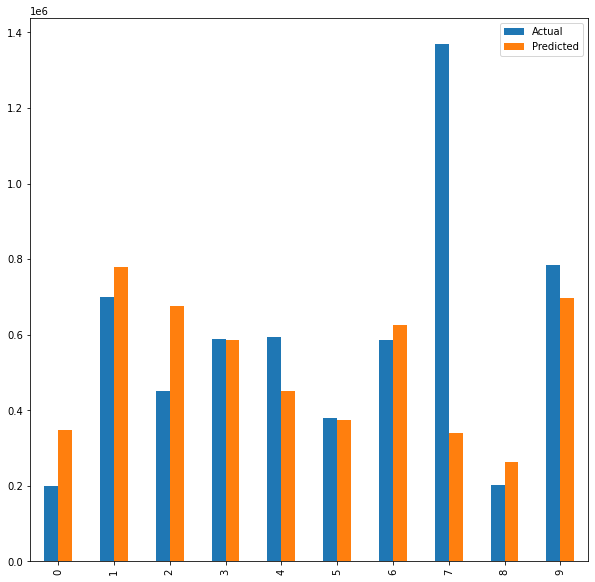

In [20]:
df.head(10).plot(kind='bar',figsize=(10,10))
plt.show()